In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

In [2]:
import re
import pandas as pd

# 示例数据
methods_data = {
    'PINN': """
    [0.0005699516519476382, 0.0004929120598308043, 0.0012566899029623545, 0.0004950391157231435, 0.0004518030371549409, 0.00046819394462347183, 0.0004955255462179124, 0.0005323208286401765, 0.00045564749392060304, 0.00047577061488484853]
    Error u of fuhe active learning(LHS sampling): 5.693854e-04
    [0.00018048538548070826, 0.00015242791700500178, 0.00032763207743430057, 0.00015457746584684936, 0.0001368868448892315, 0.00014179522421386154, 0.0001548347404831226, 0.00017439151403457153, 0.00013784934960944388, 0.0001458418817689106]
    MAE of fuhe active learning(LHS sampling): 1.706722e-04
    [6.774567710673108e-08, 5.0272585575614666e-08, 3.1625638763433416e-07, 5.082698556093488e-08, 4.240772493312518e-08, 4.539654667155842e-08, 5.094690595104137e-08, 6.012227865103933e-08, 4.311262800763308e-08, 4.681411440727687e-08]
    MSE of fuhe active learning(LHS sampling): 7.739018e-08
    [0.00012285664, 0.0022229275, 7.4937896e-05, 3.045863e-05, 0.0005867067, 9.00173e-05, 0.00010166661, 0.00014585425, 0.00014299189, 0.029513337]
    Chaos of fuhe active learning(LHS sampling): 3.303175e-03
    [4.864114e-07, 5.625959e-07, 5.1029633e-07, 4.7208448e-07, 4.6870173e-07, 4.2956322e-07, 5.8473984e-07, 4.868764e-07, 4.7052822e-07, 3.9702263e-07]
    Residual of fuhe active learning(LHS sampling): 4.868820e-07
    """,
    'Xianxing': """
    [0.002069372140017121, 0.0009318589459527695, 0.0003805648406182378, 0.0004911167070808823, 0.00047132003185745434, 0.0004874643922605124, 0.000482139396428988, 0.00048263035730341565, 0.00041940566081484715, 0.0004939456518232694]
    Error u of fuhe active learning(LHS sampling): 6.709818e-04
    [0.0005987860937128765, 0.0002721971938293058, 0.00012161645358251643, 0.00015247556998752645, 0.00014502754199694835, 0.00015065817712490222, 0.00014817376848562917, 0.00014780434606828527, 0.00012941789194340759, 0.0001537137488962908]
    MAE of fuhe active learning(LHS sampling): 2.019871e-04
    [8.855701390034132e-07, 1.7609847155530335e-07, 3.154509748844462e-08, 4.9962973398737785e-08, 4.5918129850114724e-08, 4.910921111807972e-08, 4.802122639855831e-08, 4.814015144931682e-08, 3.70776975404566e-08, 5.0528339801746145e-08]
    MSE of fuhe active learning(LHS sampling): 1.421971e-07
    [0.00010327557, 0.011731667, 7.553415e-05, 3.640775e-05, 0.0015806673, 8.354015e-05, 8.9424095e-05, 0.0001544395, 0.00017956321, 0.0029545943]
    Chaos of fuhe active learning(LHS sampling): 1.698911e-03
    [5.3346616e-07, 5.736674e-07, 4.9018877e-07, 5.264725e-07, 4.2751458e-07, 3.7412974e-07, 5.048919e-07, 4.54796e-07, 5.1004486e-07, 3.9442602e-07]
    Residual of fuhe active learning(LHS sampling): 4.789598e-07
    """,
    'Active': """
    [0.8407448953878035, 0.0006289738216378826, 0.5000183716576511, 0.00046607656163076447, 0.00048720832945583993, 0.0005141490390487713, 0.001247149974633925, 0.0005215830242152358, 0.0005491277702819459, 0.0009596275436547793]
    Error u of fuhe active learning(LHS sampling): 1.346137e-01
    [0.21779268148148143, 0.00022129318256990343, 0.12275125898505271, 0.00014682559563571458, 0.00015066961340869678, 0.0001610299009723126, 0.0003869755833269549, 0.00016767791676029726, 0.000171434041016213, 0.00032763318128877135]
    MAE of fuhe active learning(LHS sampling): 3.422775e-02
    [0.14209816505950743, 9.013643076264195e-08, 0.05028328178627376, 5.0615967502318755e-08, 4.9082311719705074e-08, 5.4622602950594376e-08, 3.2806523834062306e-07, 5.683919556652739e-08, 6.32633383867956e-08, 2.1269248999440846e-07]
    MSE of fuhe active learning(LHS sampling): 1.923824e-02
    [0.0012168993, 0.002165743, 0.0, 0.00080151425, 0.010833327, 0.0029052787, 0.01026045, 0.00014972323, 0.0012691873, 5.5764263e-05]
    Chaos of fuhe active learning(LHS sampling): 2.965789e-03
    [8.353746e-18, 4.2778765e-07, 7.4316273e-07, 4.4730723e-07, 4.8010133e-07, 3.6545612e-07, 4.2995725e-07, 4.7077538e-07, 4.744661e-07, 4.961166e-07]
    Residual of fuhe active learning(LHS sampling): 4.335130e-07
    """,
    'Residual': """
    [0.0005299288075965455, 0.0004551773318923641, 0.0005579815833606775, 0.00042461255434338055, 0.6221720622252012, 0.0009244388079192532, 0.0003217800785188063, 0.00041747346175142726, 0.0005248117448576558, 0.0004905972682993144]
    Error u of fuhe active learning(LHS sampling): 6.268189e-02
    [0.0001576014153908506, 0.00013845034870174088, 0.00017454133782997708, 0.00013604583551020754, 0.15982598732569667, 0.0002596379108787147, 9.848205661250486e-05, 0.0001318791812501021, 0.00016219609580376117, 0.00014582016314113397]
    MAE of fuhe active learning(LHS sampling): 1.612306e-02
    [5.8351926051213764e-08, 4.354002239884285e-08, 6.531210025366719e-08, 3.973412905114802e-08, 0.07841265295377735, 1.709896695724606e-07, 2.4980312286510294e-08, 3.833856078377913e-08, 5.689229939602909e-08, 4.9722453987886244e-08]
    MSE of fuhe active learning(LHS sampling): 7.841320e-03
    [0.000112795424, 0.0026282978, 0.00021051615, 6.980605e-05, 0.00024810917, 7.49897e-05, 9.9845696e-05, 0.00011962381, 0.018826716, 0.0067380113]
    Chaos of fuhe active learning(LHS sampling): 2.912871e-03
    [5.204829e-07, 4.6180412e-07, 4.4490525e-07, 4.6278683e-07, 2.438319e-07, 3.8570784e-07, 4.2628506e-07, 4.7347748e-07, 4.4858598e-07, 4.6778996e-07]
    Residual of fuhe active learning(LHS sampling): 4.335657e-07
    """,
    'Fuhe': """
    [0.000916751238474116, 0.0012282608282823855, 0.00045693664323712314, 0.0005556475975738735, 0.0004573180132531624, 0.00044900894872684744, 0.0004485880595464926, 0.8407448953878035, 0.30454014398901524, 0.0004548651186974136]
    Error u of fuhe active learning(LHS sampling): 1.150252e-01
    [0.00025898091355195995, 0.00036683121166064796, 0.00013831169522020008, 0.00018172684714993535, 0.00014330885986885735, 0.0001363582101398919, 0.00013913289829852935, 0.2177926814814815, 0.07804392028916304, 0.00013826511647893042]
    MAE of fuhe active learning(LHS sampling): 2.973395e-02
    [1.7565791951955304e-07, 3.083783282422051e-07, 4.3311767179364335e-08, 6.551202800237404e-08, 4.452621891636851e-08, 4.184539478086705e-08, 4.2763024124590895e-08, 0.14209816505950743, 0.019143705997825586, 4.3329384385993914e-08]
    MSE of fuhe active learning(LHS sampling): 1.612426e-02
    [0.00010235844, 0.00502297, 0.00015173893, 0.011308271, 0.008238857, 7.700975e-05, 0.0001372657, 0.0, 0.00046176728, 0.009272396]
    Chaos of fuhe active learning(LHS sampling): 3.477263e-03
    [4.4570697e-07, 4.485762e-07, 4.3899058e-07, 4.765525e-07, 5.0502604e-07, 4.6440528e-07, 4.803039e-07, 1.3615753e-18, 2.4685287e-06, 4.2756233e-07]
    Residual of fuhe active learning(LHS sampling): 6.155652e-07
    """,
    'Chaos': """
    [0.0004927691407041606, 0.5922375028430962, 0.3306601474151915, 0.0006328132814266662, 0.5617974568008343, 0.0004974791084760778, 0.0009151637368940032, 0.00048269491606392495, 0.0006563563427320136, 0.0012348473901453844]
    Error u of fuhe active learning(LHS sampling): 1.489607e-01
    [0.00015253555136283213, 0.143250441265993, 0.08967086266385399, 0.00021959226063214624, 0.1398001703421743, 0.0001577609873923984, 0.00031666048288397214, 0.00014869981548162807, 0.00023170062569302676, 0.00040801180026799375]
    MAE of fuhe active learning(LHS sampling): 3.743564e-02
    [5.052815798858295e-08, 0.0705929416887539, 0.021815037511121165, 8.9267868596159e-08, 0.0641581918469694, 5.1577603625395126e-08, 1.9136129757354547e-07, 4.82163443026309e-08, 9.742490058169635e-08, 3.380984864842036e-07]
    MSE of fuhe active learning(LHS sampling): 1.565670e-02
    [0.009513864, 510.8327, 0.0, 2.4409124e-05, 1373.2224, 9.496711e-05, 8.172786e-05, 0.0001336733, 0.00015224161, 0.00025750953]
    Chaos of fuhe active learning(LHS sampling): 1.884065e+02
    [4.8198217e-07, 8.0360286e-07, 1.5409707e-06, 4.5031584e-07, 1.2713217e-06, 4.4356352e-07, 4.6731407e-07, 4.445144e-07, 4.8273887e-07, 5.3322583e-07]
    Residual of fuhe active learning(LHS sampling): 6.919550e-07
    """,
    '0.9Residual': """
    [0.0004481850302001684, 0.0004146950018881605, 0.0004960675116553978, 0.00045278913660481556, 0.00045092852491221045, 0.0004129053832536286, 0.0004540901049072598, 0.0005131716279776311, 0.00047882622021955365, 0.40616223553898895]
    Error u of fuhe active learning(LHS sampling): 4.102839e-02
    [0.00013635545460903757, 0.0001285424572155964, 0.0001488264334566101, 0.0001406396471499675, 0.0001369161025266589, 0.00012864186261567724, 0.00013979904349165407, 0.00015420920004619265, 0.00014417523089357514, 0.10456242442887156]
    MAE of fuhe active learning(LHS sampling): 1.058205e-02
    [4.2258257590242514e-08, 3.6545613202867065e-08, 5.134192854844752e-08, 4.33529581049235e-08, 4.243190714794155e-08, 3.691559750647881e-08, 4.344904280005271e-08, 5.446059366798134e-08, 4.7891010756995745e-08, 0.033734832272190124]
    MSE of fuhe active learning(LHS sampling): 3.373523e-03
    [0.005327477, 0.004244929, 0.0001399676, 0.1984022, 0.0001627829, 0.00012056661, 9.838217e-05, 1.1009458e-05, 0.0029939068, 0.00078555313]
    Chaos of fuhe active learning(LHS sampling): 2.122868e-02
    [5.2345445e-07, 4.6342643e-07, 4.2669194e-07, 5.093473e-07, 4.2887086e-07, 4.252954e-07, 4.2123725e-07, 4.4585124e-07, 4.980502e-07, 6.777118e-07]
    Residual of fuhe active learning(LHS sampling): 4.819937e-07
    """,
    '0.8Residual': """
    [0.00044033314880244644, 0.00045903074058145735, 0.0006387084548076398, 0.00047433349295575495, 0.00044694532172329945, 0.0004633475387174799, 0.0004573828272828165, 0.00047951091203536, 0.0005036662863844496, 0.0005193538702195712]
    Error u of fuhe active learning(LHS sampling): 4.882613e-04
    [0.00013636600219054016, 0.00014065129860333405, 0.00019321532022835344, 0.000145442572517831, 0.00013521633936977096, 0.00014044701392473824, 0.00013947531139209837, 0.00014565097539107535, 0.00015112568674647086, 0.00015794960904446027]
    MAE of fuhe active learning(LHS sampling): 1.485540e-04
    [4.108120855000637e-08, 4.381948270935862e-08, 8.42390001564641e-08, 4.683376519125927e-08, 4.197941672267708e-08, 4.497769390463633e-08, 4.388024366641424e-08, 4.753143209406734e-08, 5.2476899339858045e-08, 5.631972096615343e-08]
    MSE of fuhe active learning(LHS sampling): 5.031389e-08
    [0.005102197, 0.0071586207, 0.00016002031, 0.8899947, 0.00013107658, 0.00013279193, 9.0317364e-05, 8.720119e-06, 0.0030282955, 9.142789e-05]
    Chaos of fuhe active learning(LHS sampling): 9.058981e-02
    [4.652311e-07, 4.4877595e-07, 4.8368565e-07, 4.4356102e-07, 4.6505954e-07, 3.861544e-07, 5.05363e-07, 4.837141e-07, 5.1234906e-07, 4.9183495e-07]
    Residual of fuhe active learning(LHS sampling): 4.685729e-07
    """,
    '0.7Residual': """
    [0.00045923055417779895, 0.0003805195898261856, 0.00046599589898333463, 0.00046747487026509404, 0.00045403084568467524, 0.0004705600674900421, 0.0004604943863655175, 0.00046439912000889746, 0.00046725411369758375, 0.0005324882468577318]
    Error u of fuhe active learning(LHS sampling): 4.622448e-04
    [0.00014025014785666178, 0.00012330366198635658, 0.0001406931332183354, 0.00014315082258136954, 0.00013857859174272303, 0.0001420651370555427, 0.00014100246765852255, 0.00014000688516935478, 0.00014145210762449018, 0.0001625927164581426]
    MAE of fuhe active learning(LHS sampling): 1.413096e-04
    [4.423519388343329e-08, 3.28702686893946e-08, 4.540074511476649e-08, 4.558819972743756e-08, 4.2605986612842545e-08, 4.6204191755255835e-08, 4.4642112865802436e-08, 4.492584896773996e-08, 4.5614551216907014e-08, 5.905083640115016e-08]
    MSE of fuhe active learning(LHS sampling): 4.511379e-08
    [0.0083980495, 0.004980512, 0.00014981862, 0.08522135, 0.004440362, 0.00011760158, 9.8106364e-05, 4.529953e-06, 0.0039979485, 0.00010213685]
    Chaos of fuhe active learning(LHS sampling): 1.075104e-02
    [4.3858063e-07, 4.9004484e-07, 4.866275e-07, 4.77517e-07, 4.2084434e-07, 3.9956672e-07, 4.9082746e-07, 4.5736613e-07, 4.4355988e-07, 4.217593e-07]
    Residual of fuhe active learning(LHS sampling): 4.526694e-07
    """,
    '0.6Residual': """
    [0.00042804895034136316, 0.00043836714051394575, 0.0004517598774652929, 0.0004606184570832019, 0.0007787459617002917, 0.0004881932752423839, 0.00045842942779228873, 0.0004734121719249861, 0.00045825854867051106, 0.0004518982899952313]
    Error u of fuhe active learning(LHS sampling): 4.887732e-04
    [0.00013628279733653953, 0.00013267303810398932, 0.00013813141034396605, 0.00014471441385339271, 0.0002238483442432778, 0.0001473713657237207, 0.0001397402987557446, 0.00014428243364056885, 0.00013928280825873315, 0.00014012673893241227]
    MAE of fuhe active learning(LHS sampling): 1.486454e-04
    [3.9337632619037916e-08, 4.016225630691893e-08, 4.310116241258804e-08, 4.4427027627240256e-08, 1.2745388174334242e-07, 4.959768608247224e-08, 4.4173033907964714e-08, 4.65690055438146e-08, 4.396297110417339e-08, 4.292766680281183e-08]
    MSE of fuhe active learning(LHS sampling): 5.217123e-08
    [0.007259813, 0.0059985695, 0.00017531606, 0.009422082, 0.0039510056, 0.00012648696, 0.000101060745, 4.053455e-05, 0.0021839428, 0.0039959596]
    Chaos of fuhe active learning(LHS sampling): 3.325477e-03
    [4.8378433e-07, 4.7109756e-07, 4.7725416e-07, 4.941694e-07, 4.828157e-07, 4.2413717e-07, 4.2379747e-07, 4.4313742e-07, 3.868447e-07, 4.903777e-07]
    Residual of fuhe active learning(LHS sampling): 4.577416e-07
    """,
    '0.4Residual': """
    [0.0005470682847400836, 0.0015360103379981492, 0.0004955259671739534, 0.000462744083537044, 0.00046641284095270773, 0.0004431740046775938, 0.0004664982505468486, 0.0004621089648226055, 0.00045502099592494965, 0.0004518366927347042]
    Error u of fuhe active learning(LHS sampling): 5.786400e-04
    [0.00017883851361983453, 0.00041118303587687035, 0.00015135997696058413, 0.00014607883354233344, 0.0001417612076015537, 0.0001346204193521946, 0.00014386810534736507, 0.00014354986975976196, 0.0001396347141988967, 0.00013950162222218227]
    MAE of fuhe active learning(LHS sampling): 1.730396e-04
    [6.273756364436129e-08, 4.7120918034404836e-07, 5.083873104649043e-08, 4.4794913743344144e-08, 4.545981924872583e-08, 4.121960048894852e-08, 4.663712783376049e-08, 4.479113819136511e-08, 4.369821810751309e-08, 4.276296126879881e-08]
    MSE of fuhe active learning(LHS sampling): 8.941493e-08
    [0.011121352, 0.0066190627, 0.0001986114, 0.034015268, 0.0016489715, 0.00013193188, 9.008245e-05, 0.07447911, 0.0018658477, 0.0036939078]
    Chaos of fuhe active learning(LHS sampling): 1.338641e-02
    [5.5789315e-07, 4.956644e-07, 4.3651994e-07, 4.491426e-07, 4.6075888e-07, 4.3642035e-07, 4.5202705e-07, 4.683552e-07, 4.4031412e-07, 5.3228496e-07]
    Residual of fuhe active learning(LHS sampling): 4.729381e-07
    """,
    '0.3Residual': """
    [0.0004523734538605247, 0.00045032159199355547, 0.0004716722024462947, 0.0006582087127901049, 0.00047821076571547255, 0.0004613429886161121, 0.0006314169365161759, 0.0010249996127729634, 0.0004623917388128569, 0.0004541005565188387]
    Error u of fuhe active learning(LHS sampling): 5.545039e-04
    [0.00014419178581656362, 0.00013628265838117886, 0.00016213229328520962, 0.00020485770425273555, 0.00014592775304012775, 0.0001387320828381431, 0.00019197426284733206, 0.0003087683606529892, 0.00014003831232153288, 0.00014240727827350433]
    MAE of fuhe active learning(LHS sampling): 1.715312e-04
    [4.3191656826282457e-08, 4.2425784715465804e-08, 5.5722170011646176e-08, 9.022059049522408e-08, 4.755247280852395e-08, 4.436132337372212e-08, 8.356254245852741e-08, 2.1305555429004065e-07, 4.459127771081288e-08, 4.3516558889014074e-08]
    MSE of fuhe active learning(LHS sampling): 7.081999e-08
    [0.007560974, 0.0084497295, 0.00045693188, 0.014898504, 5.273999, 0.0001352244, 9.3471914e-05, 0.02498553, 0.0022132061, 0.0001671169]
    Chaos of fuhe active learning(LHS sampling): 5.332960e-01
    [4.583926e-07, 4.0914983e-07, 4.1799785e-07, 4.868134e-07, 4.4910666e-07, 3.8411713e-07, 4.7710114e-07, 4.6610126e-07, 4.6738091e-07, 4.8088896e-07]
    Residual of fuhe active learning(LHS sampling): 4.497050e-07
    """,
    '0.2Residual': """
    [0.0005120846933561239, 0.0008330886145383339, 0.00037986587951980823, 0.0004575557458218991, 0.00045051764534539073, 0.00045982114218019927, 0.0004868421923899377, 0.0004592008607864952, 0.0005037713273463572, 0.001388033768796587]
    Error u of fuhe active learning(LHS sampling): 5.930782e-04
    [0.00015749086593917384, 0.0002505218897381128, 0.00012882880140966868, 0.0001435605191082996, 0.00013791913121810197, 0.0001393455040931015, 0.00014858090807152899, 0.00014030615161698514, 0.00015895182908548183, 0.0004050121112957368]
    MAE of fuhe active learning(LHS sampling): 1.810518e-04
    [5.4333141399947943e-08, 1.4556925415635788e-07, 3.3438649512489837e-08, 4.397695781582687e-08, 4.286581135505273e-08, 4.4053233045064835e-08, 4.958155338019081e-08, 4.3877623490042004e-08, 5.3202404428802984e-08, 4.0038438180020706e-07]
    MSE of fuhe active learning(LHS sampling): 9.112830e-08
    [0.0063215625, 0.010325428, 0.00021552284, 0.00023418496, 0.00011687762, 9.208445e-05, 8.46519e-05, 0.15290587, 0.0024992947, 0.00024434872]
    Chaos of fuhe active learning(LHS sampling): 1.730398e-02
    [4.4574062e-07, 4.6390676e-07, 4.804642e-07, 4.226672e-07, 4.627825e-07, 4.130709e-07, 4.5058732e-07, 4.3783552e-07, 4.2770796e-07, 4.6293974e-07]
    Residual of fuhe active learning(LHS sampling): 4.467703e-07
    """,
    '0.1Residual': """
    [0.0004647022584697867, 0.0004580980912167971, 0.0009462714664935335, 0.0003529198927649876, 0.002306216842074118, 0.0004589993287535919, 0.00029997478913367133, 0.0004649164644571087, 0.00045160016605052985, 0.0004614672658015532]
    Error u of fuhe active learning(LHS sampling): 6.665167e-04
    [0.00014266577498218253, 0.000137052202171367, 0.00028130952279649374, 0.00013987418129760224, 0.0006053058525206887, 0.00013889004101937807, 0.00012978357340200037, 0.0001405964178804617, 0.00013666651277753443, 0.00013979438972039988]
    MAE of fuhe active learning(LHS sampling): 1.991938e-04
    [4.486112106795405e-08, 4.3614452210769645e-08, 1.867997780154406e-07, 3.913059224706379e-08, 1.0639504160282583e-06, 4.387123970835664e-08, 3.292060772469953e-08, 4.486689162365184e-08, 4.264364917014079e-08, 4.4548400985650814e-08]
    MSE of fuhe active learning(LHS sampling): 1.587207e-07
    [0.00038232136, 0.0044518737, 0.00015819426, 60.12349, 0.00012965722, 7.890012e-05, 9.41707e-05, 0.032080878, 0.00017059875, 0.00015086634]
    Chaos of fuhe active learning(LHS sampling): 6.016119e+00
    [4.5472325e-07, 5.6272495e-07, 4.222669e-07, 4.5083107e-07, 4.5792444e-07, 4.3964383e-07, 4.3144973e-07, 4.7850517e-07, 4.974994e-07, 4.7902586e-07]
    Residual of fuhe active learning(LHS sampling): 4.674595e-07
    """,

}

# 定义读取数据的函数
def extract_metrics(data):
    # 使用正则表达式提取数据
    error_u = re.findall(r'\[([^\]]+)\]', data)[0]
    mae = re.findall(r'\[([^\]]+)\]', data)[1]
    mse = re.findall(r'\[([^\]]+)\]', data)[2]
    chaos = re.findall(r'\[([^\]]+)\]', data)[3]
    residual = re.findall(r'\[([^\]]+)\]', data)[4]
    
    # 将字符串转换为浮点数列表
    error_u = list(map(float, error_u.split(',')))
    mae = list(map(float, mae.split(',')))
    mse = list(map(float, mse.split(',')))
    chaos = list(map(float, chaos.split(',')))
    residual = list(map(float, residual.split(',')))
    
    return error_u, mae, mse, chaos, residual

# 定义处理所有方法数据的函数
def process_methods_data(methods_data):
    data = {
        'Method': [],
        'Metric': [],
        'Values': []
    }
    
    for method, data_str in methods_data.items():
        error_u, mae, mse, chaos, residual = extract_metrics(data_str)
        
        data['Method'].append(method)
        data['Metric'].append('Error_u')
        data['Values'].append(error_u)
        
        data['Method'].append(method)
        data['Metric'].append('MAE')
        data['Values'].append(mae)
        
        data['Method'].append(method)
        data['Metric'].append('MSE')
        data['Values'].append(mse)

        data['Method'].append(method)
        data['Metric'].append('Chaos')
        data['Values'].append(chaos)

        data['Method'].append(method)
        data['Metric'].append('Residual')
        data['Values'].append(residual)
    
    return pd.DataFrame(data)

# 处理方法数据并生成 DataFrame
df = process_methods_data(methods_data)

# 打印 DataFrame
print(df)

         Method    Metric                                             Values
0          PINN   Error_u  [0.0005699516519476382, 0.0004929120598308043,...
1          PINN       MAE  [0.00018048538548070826, 0.0001524279170050017...
2          PINN       MSE  [6.774567710673108e-08, 5.0272585575614666e-08...
3          PINN     Chaos  [0.00012285664, 0.0022229275, 7.4937896e-05, 3...
4          PINN  Residual  [4.864114e-07, 5.625959e-07, 5.1029633e-07, 4....
..          ...       ...                                                ...
65  0.1Residual   Error_u  [0.0004647022584697867, 0.0004580980912167971,...
66  0.1Residual       MAE  [0.00014266577498218253, 0.000137052202171367,...
67  0.1Residual       MSE  [4.486112106795405e-08, 4.3614452210769645e-08...
68  0.1Residual     Chaos  [0.00038232136, 0.0044518737, 0.00015819426, 6...
69  0.1Residual  Residual  [4.5472325e-07, 5.6272495e-07, 4.222669e-07, 4...

[70 rows x 3 columns]


In [3]:
# 展开 Values 列
df = df.explode('Values').reset_index(drop=True)

# 将 Values 列转换为浮点数
df['Values'] = df['Values'].astype(float)

# 打印 DataFrame
print(df)

          Method    Metric        Values
0           PINN   Error_u  5.699517e-04
1           PINN   Error_u  4.929121e-04
2           PINN   Error_u  1.256690e-03
3           PINN   Error_u  4.950391e-04
4           PINN   Error_u  4.518030e-04
..           ...       ...           ...
695  0.1Residual  Residual  4.396438e-07
696  0.1Residual  Residual  4.314497e-07
697  0.1Residual  Residual  4.785052e-07
698  0.1Residual  Residual  4.974994e-07
699  0.1Residual  Residual  4.790259e-07

[700 rows x 3 columns]


C:\Users\cheny\AppData\Local\Temp\ipykernel_25080\737970397.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


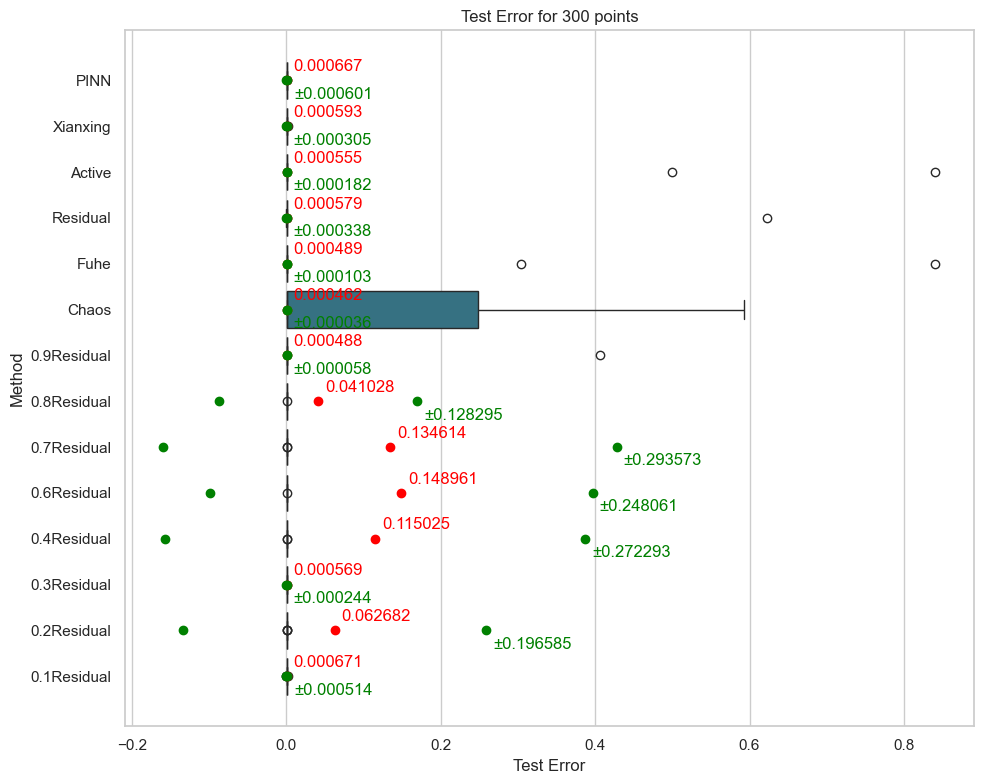

In [10]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'Error_u']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('Test Error for 300 points')
ax.set_ylabel('Method')
ax.set_xlabel('Test Error')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.6f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()

In [11]:
(0.000579-0.000462)/0.000462

0.25324675324675316

C:\Users\cheny\AppData\Local\Temp\ipykernel_25080\2511082042.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


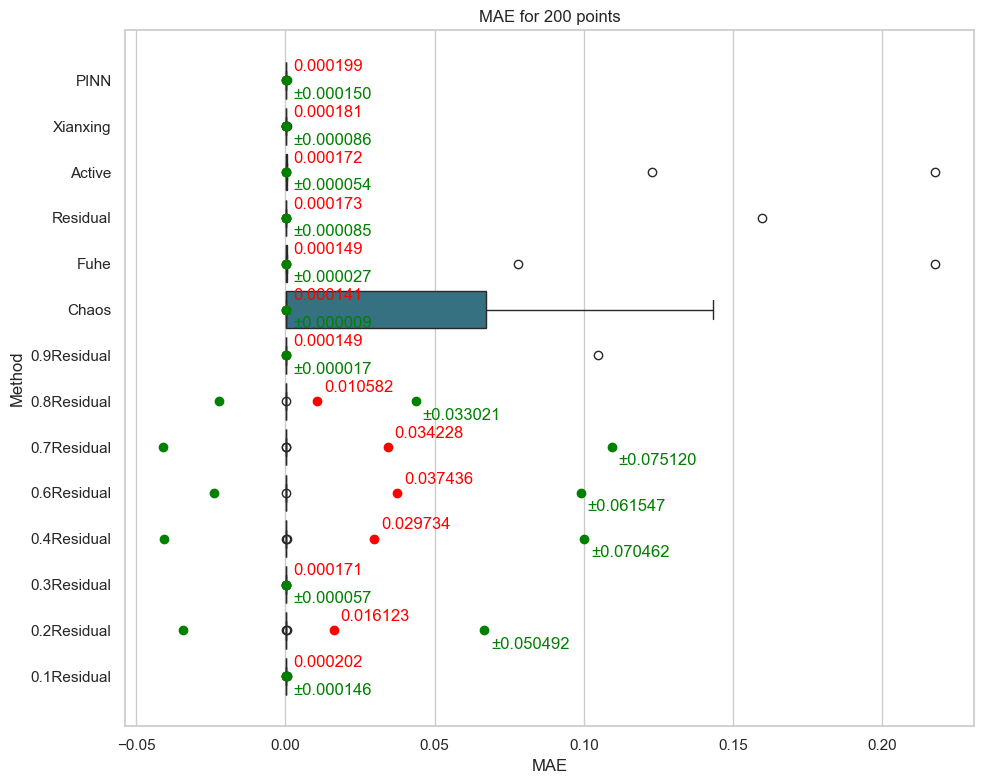

In [12]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'MAE']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('MAE for 200 points')
ax.set_ylabel('Method')
ax.set_xlabel('MAE')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.6f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_25080\3931724504.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


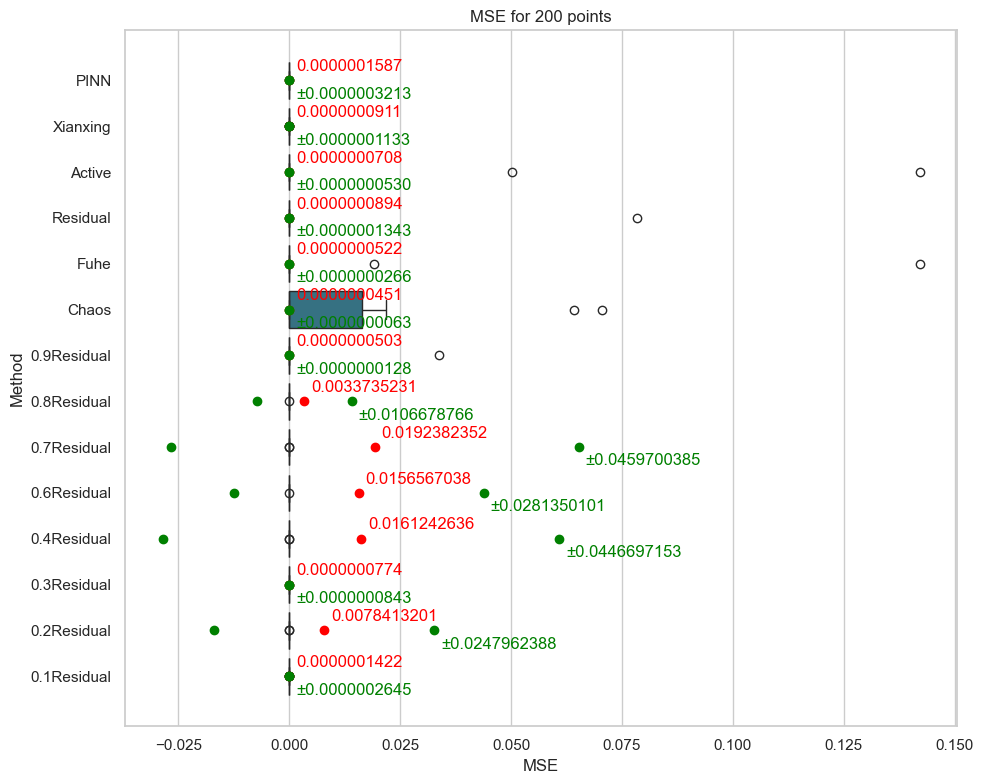

In [13]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'MSE']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('MSE for 200 points')
ax.set_ylabel('Method')
ax.set_xlabel('MSE')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.10f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.10f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_25080\1965969920.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


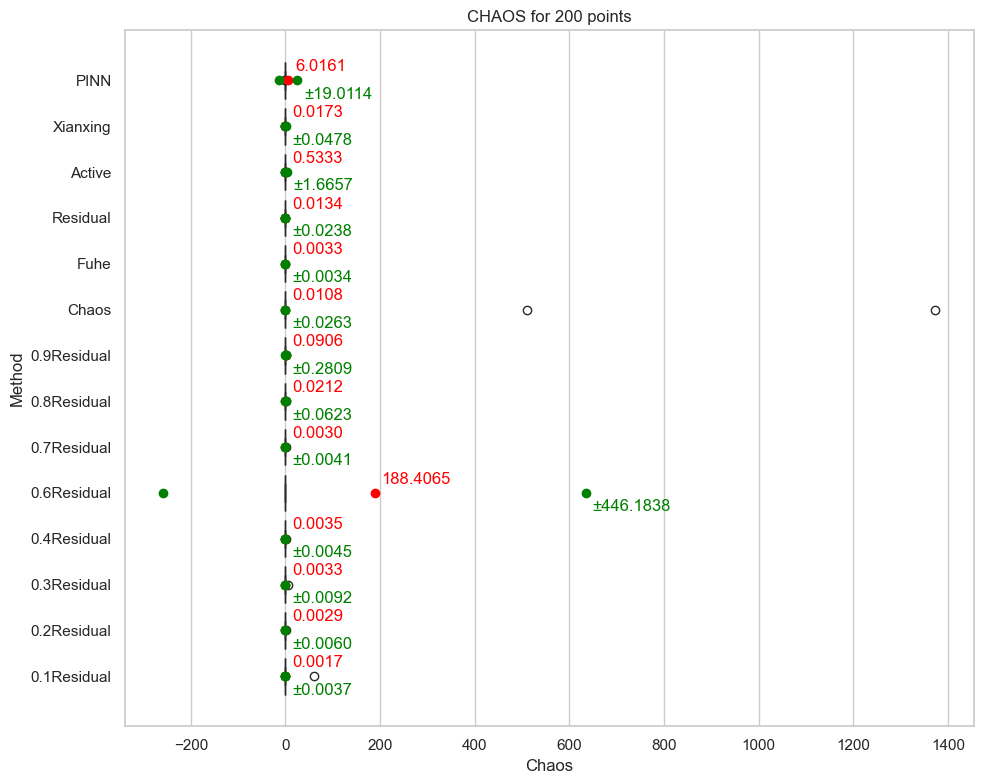

In [8]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'Chaos']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('CHAOS for 200 points')
ax.set_ylabel('Method')
ax.set_xlabel('Chaos')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.4f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.4f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_25080\1758888948.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


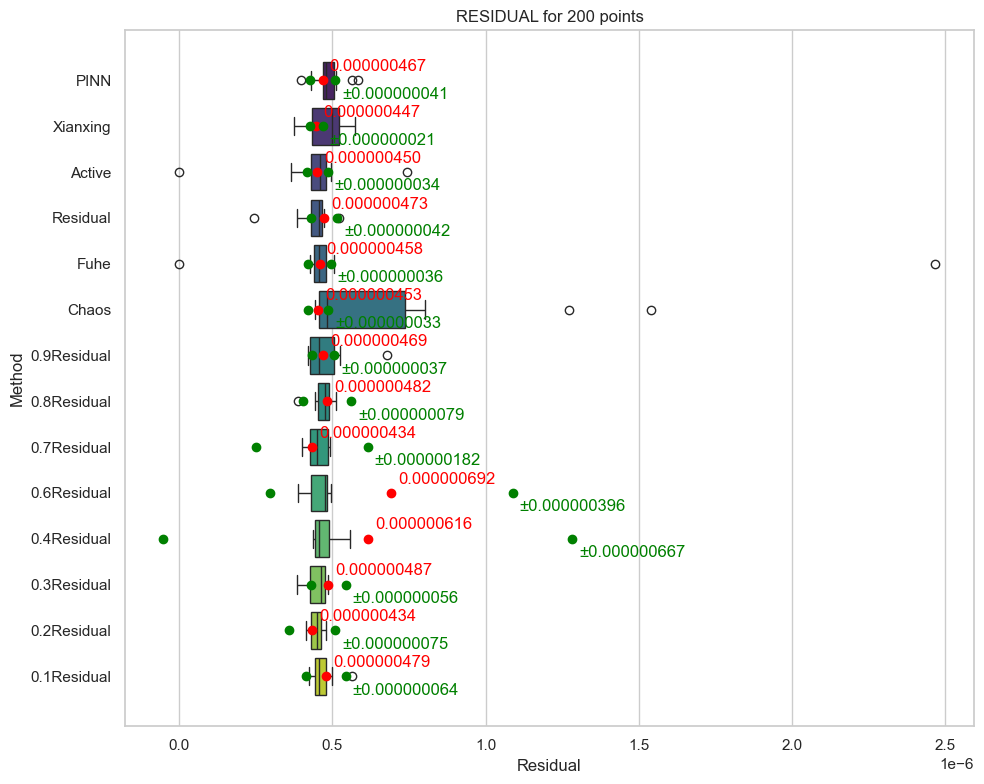

In [9]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'Residual']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('RESIDUAL for 200 points')
ax.set_ylabel('Method')
ax.set_xlabel('Residual')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.9f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.9f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()